In [53]:


import numpy as np
import matplotlib.pyplot as plt
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import quantities as pq
import neo

In [4]:

#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


In [5]:
#@title Data loading
import numpy as np


fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [54]:
def get_trials_mv_rtl(dat):
    ind=(dat['response'][:]==-1)
    left_act=dat['spks'][:,ind]
    return left_act


def get_trials_mv_ltr(dat):
    ind=(dat['response'][:]==1)
    left_act=dat['spks'][:,ind]
    return left_act
     
def get_trials_nogo(dat):
    ind=(dat['response'][:]==0)
    left_act=dat['spks'][:,ind]
    return left_act   


def get_spike_times(spikes):
    
    spike_times_trials=list()
    for i in range(spikes.shape[1]):
        trial=spikes[:,i]
        #neuron_time=list()
        neurons_in_trial=list()
        for neuron in trial:
            indices=(neuron[:]!=0)
            spike_train_=np.multiply(indices,np.arange(250))
            spike_train_neuron=np.hstack([[0],spike_train_[indices]])
            neurons_in_trial.append(neo.SpikeTrain(spike_train_neuron*pq.ms,t_stop=250.0))

        spike_times_trials.append(neurons_in_trial)
    return spike_times_trials

            
            
            
            
        
        

In [55]:
dat=alldat[0]
spikes=dat['spks']
trials=spikes.shape[1]
spike_trains=get_spike_times(spikes)


In [56]:
from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 2
gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)


In [58]:
gpfa_2dim.fit(spike_trains[:trials])
trajectories = gpfa_2dim.transform(spike_trains[trials//2:])

Initializing parameters using factor analysis...

Fitting GPFA model...


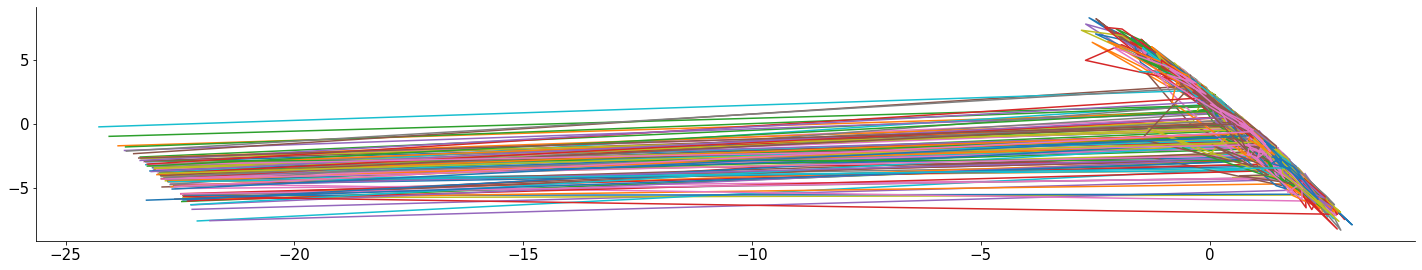

In [60]:
for single_trial_trajectory in trajectories:
    plt.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-')

In [51]:
print(spike_trains[0][1])


[  0 144]
